In [288]:
# This is a prototype program to work on
# Kaggle Titanic competition using pytorch.
# In the training set, we have 891 rows (data)
# and 7 features (selected columns) and 2 classes
# (survived/not survived).

# I learned to create network in pytorch and its
# other useful function. But, I could not solve
# the titanic problem completely with good accuracy.

# I am actually stuck in fixing the dimensions of
# predicted output (y_pred) and actual output(y_train).
# because y_pred is 891*2 because of 2 classes
# and y_train is 891*1 because there is only one column
# "Survived" with 0/1 values.
# I have spent lots of time on this.
# So I am going to stop this here.

# I found out the solution. I just need to divide
# y_train(Survived) into two columns (survived/notsurvived)
# I need to train based on that.


import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
import torch.nn.functional as F

import pandas as pd
from pandas import Series, DataFrame

class Net(nn.Module):
    def __init__(self, D_in, H, D_out):
        super(Net, self).__init__()
        self.linear1 = nn.Linear(D_in, H)
        self.linear2 = nn.Linear(H, H)
        self.linear3 = nn.Linear(H, D_out)
        
    def forward(self, x):
        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        x = self.linear3(x)
        return x

# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.

N, D_in, H, D_out = 891, 7, 100, 2

N_test = 417

In [289]:
# import numpy as np
# arr = np.random.rand(N, D_in)
# x = torch.from_numpy(arr).float()
# x = Variable(x)

x = Variable(torch.randn(N, D_in))
# x.t()

y = Variable(torch.randn(N, D_out).random_(0,1), requires_grad=False)
print(y)
# y.t()

x_test = Variable(torch.from_numpy(np.random.rand(N_test, D_in)).float())

Variable containing:
    0     1
    0     0
    1     0
     ⋮      
    1     1
    1     1
    1     0
[torch.FloatTensor of size 891x2]



In [265]:
model = Net(D_in, H, D_out)
criterion = nn.MSELoss(size_average=False)
optimizer = optim.Adam(model.parameters(), lr=1e-4)

current_loss = 0
all_losses = []    

plot_every  = 50

epoch = 5000

for t in range(epoch):

    
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(x)
    
    # Compute and print loss               
    loss = criterion(y_pred, y)
    print(t, loss.data[0])
    current_loss += loss.data[0]
    
    # Make the gradients zero
    optimizer.zero_grad()
    
    # Backward pass
    loss.backward()
    
    # Update weights
    optimizer.step()
    
    if t % plot_every == 0:
        all_losses.append(current_loss / plot_every)
        current_loss = 0

0 376.3843994140625
1 370.49462890625
2 364.74273681640625
3 359.12750244140625
4 353.6501159667969
5 348.3179626464844
6 343.13165283203125
7 338.0889892578125
8 333.1937561035156
9 328.4457702636719
10 323.84637451171875
11 319.3922119140625
12 315.08319091796875
13 310.9247131347656
14 306.9167175292969
15 303.0568542480469
16 299.3462829589844
17 295.78094482421875
18 292.35809326171875
19 289.0758972167969
20 285.9361267089844
21 282.93475341796875
22 280.0696716308594
23 277.33648681640625
24 274.73699951171875
25 272.2663269042969
26 269.92205810546875
27 267.70556640625
28 265.6092834472656
29 263.6295166015625
30 261.7627258300781
31 259.9992980957031
32 258.3399963378906
33 256.7839660644531
34 255.32888793945312
35 253.9689483642578
36 252.69969177246094
37 251.51507568359375
38 250.4130401611328
39 249.388427734375
40 248.43634033203125
41 247.55409240722656
42 246.7375946044922
43 245.98333740234375
44 245.28564453125
45 244.64224243164062
46 244.04808044433594
47 243.4967

In [266]:
output = model(x_test)

_, predicted = torch.max(output.data,1)

results = predicted.numpy().flatten().tolist()

ground_truth_df = pd.read_csv('input-files/gender_submission.csv')

ground_truth = ground_truth_df["Survived"]

correct = 0
total = N_test

for data_results, data_gt in zip(results, ground_truth):
    correct += (data_results == data_gt).sum()

print(' Accuracy of the network : %d %%' % 
      (100 * correct / total))

 Accuracy of the network : 63 %


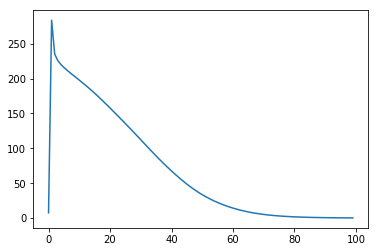

In [267]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

plt.figure()
plt.plot(all_losses)

In [280]:
a = torch.randn(5,1).random_(0,1)

In [281]:
b = torch.randn(5,1).random_(0,1)
print(a,b)


 0
 0
 0
 0
 0
[torch.FloatTensor of size 5x1]
 
 1
 0
 0
 1
 1
[torch.FloatTensor of size 5x1]



In [283]:
torch.cat((a,b),1)


 0  1
 0  0
 0  0
 0  1
 0  1
[torch.FloatTensor of size 5x2]